In [1]:
import tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
import numpy as np
from numpy.linalg import norm
import os
from tqdm import tqdm
import pickle

In [2]:
model = ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
model.trainable = False

In [3]:
model = tensorflow.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])

In [4]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_max_pooling2d (Globa  (None, 2048)             0         
 lMaxPooling2D)                                                  
                                                                 
Total params: 23,587,712
Trainable params: 0
Non-trainable params: 23,587,712
_________________________________________________________________
None


In [5]:
img = image.load_img(r'E:\Art Images dataset\Art_Dataset_Clear\Foreign\F (16).jpg',target_size=(224,224))

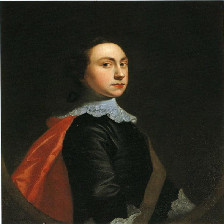

In [6]:
img

In [7]:
img_array = image.img_to_array(img)

In [8]:
img_array

array([[[236., 247., 249.],
        [238., 246., 248.],
        [248., 252., 251.],
        ...,
        [ 63.,  78.,  73.],
        [ 80.,  89.,  94.],
        [ 90.,  98., 100.]],

       [[ 34.,  44.,  43.],
        [ 24.,  33.,  30.],
        [ 27.,  29.,  24.],
        ...,
        [ 20.,  30.,  21.],
        [ 17.,  23.,  23.],
        [ 33.,  35.,  32.]],

       [[ 24.,  33.,  28.],
        [ 28.,  35.,  27.],
        [ 26.,  29.,  18.],
        ...,
        [ 27.,  30.,  19.],
        [ 28.,  28.,  26.],
        [ 38.,  37.,  32.]],

       ...,

       [[252., 255., 255.],
        [149., 151., 150.],
        [ 41.,  42.,  36.],
        ...,
        [ 40.,  38.,  26.],
        [ 40.,  42.,  29.],
        [ 46.,  48.,  35.]],

       [[251., 255., 255.],
        [147., 149., 148.],
        [ 40.,  41.,  35.],
        ...,
        [ 38.,  36.,  24.],
        [ 40.,  40.,  28.],
        [ 43.,  43.,  31.]],

       [[250., 254., 255.],
        [146., 148., 147.],
        [ 42.,  

In [9]:
with np.printoptions(threshold=np.inf):
    print(img_array)

[[[236. 247. 249.]
  [238. 246. 248.]
  [248. 252. 251.]
  [243. 247. 246.]
  [245. 250. 253.]
  [238. 249. 253.]
  [246. 247. 249.]
  [245. 246. 248.]
  [244. 245. 247.]
  [244. 245. 247.]
  [243. 244. 246.]
  [240. 241. 243.]
  [245. 249. 252.]
  [242. 247. 250.]
  [242. 247. 250.]
  [241. 246. 249.]
  [238. 243. 246.]
  [238. 243. 246.]
  [241. 242. 246.]
  [241. 240. 245.]
  [240. 239. 244.]
  [241. 242. 246.]
  [239. 243. 246.]
  [239. 243. 246.]
  [234. 242. 244.]
  [233. 241. 243.]
  [232. 240. 242.]
  [232. 236. 239.]
  [232. 236. 239.]
  [233. 234. 238.]
  [233. 237. 240.]
  [232. 237. 241.]
  [232. 237. 240.]
  [234. 240. 240.]
  [230. 236. 234.]
  [233. 239. 237.]
  [227. 233. 233.]
  [227. 232. 235.]
  [228. 233. 236.]
  [231. 236. 239.]
  [231. 236. 239.]
  [233. 238. 241.]
  [233. 238. 241.]
  [229. 234. 237.]
  [228. 233. 236.]
  [228. 233. 236.]
  [226. 231. 234.]
  [225. 230. 233.]
  [225. 229. 232.]
  [224. 225. 229.]
  [225. 226. 230.]
  [226. 227. 231.]
  [224. 225.

In [10]:
img_array.shape

(224, 224, 3)

In [11]:
expanded_img_array = np.expand_dims(img_array, axis=0)

In [12]:
expanded_img_array.shape

(1, 224, 224, 3)

In [13]:
with np.printoptions(threshold=np.inf):
    print(expanded_img_array)

[[[[236. 247. 249.]
   [238. 246. 248.]
   [248. 252. 251.]
   [243. 247. 246.]
   [245. 250. 253.]
   [238. 249. 253.]
   [246. 247. 249.]
   [245. 246. 248.]
   [244. 245. 247.]
   [244. 245. 247.]
   [243. 244. 246.]
   [240. 241. 243.]
   [245. 249. 252.]
   [242. 247. 250.]
   [242. 247. 250.]
   [241. 246. 249.]
   [238. 243. 246.]
   [238. 243. 246.]
   [241. 242. 246.]
   [241. 240. 245.]
   [240. 239. 244.]
   [241. 242. 246.]
   [239. 243. 246.]
   [239. 243. 246.]
   [234. 242. 244.]
   [233. 241. 243.]
   [232. 240. 242.]
   [232. 236. 239.]
   [232. 236. 239.]
   [233. 234. 238.]
   [233. 237. 240.]
   [232. 237. 241.]
   [232. 237. 240.]
   [234. 240. 240.]
   [230. 236. 234.]
   [233. 239. 237.]
   [227. 233. 233.]
   [227. 232. 235.]
   [228. 233. 236.]
   [231. 236. 239.]
   [231. 236. 239.]
   [233. 238. 241.]
   [233. 238. 241.]
   [229. 234. 237.]
   [228. 233. 236.]
   [228. 233. 236.]
   [226. 231. 234.]
   [225. 230. 233.]
   [225. 229. 232.]
   [224. 225. 229.]


In [14]:
preprocessed_img = preprocess_input(expanded_img_array)

In [15]:
preprocessed_img

array([[[[ 145.061   ,  130.22101 ,  112.32    ],
         [ 144.061   ,  129.22101 ,  114.32    ],
         [ 147.061   ,  135.22101 ,  124.32    ],
         ...,
         [ -30.939003,  -38.779   ,  -60.68    ],
         [  -9.939003,  -27.779   ,  -43.68    ],
         [  -3.939003,  -18.779   ,  -33.68    ]],

        [[ -60.939003,  -72.779   ,  -89.68    ],
         [ -73.939   ,  -83.779   ,  -99.68    ],
         [ -79.939   ,  -87.779   ,  -96.68    ],
         ...,
         [ -82.939   ,  -86.779   , -103.68    ],
         [ -80.939   ,  -93.779   , -106.68    ],
         [ -71.939   ,  -81.779   ,  -90.68    ]],

        [[ -75.939   ,  -83.779   ,  -99.68    ],
         [ -76.939   ,  -81.779   ,  -95.68    ],
         [ -85.939   ,  -87.779   ,  -97.68    ],
         ...,
         [ -84.939   ,  -86.779   ,  -96.68    ],
         [ -77.939   ,  -88.779   ,  -95.68    ],
         [ -71.939   ,  -79.779   ,  -85.68    ]],

        ...,

        [[ 151.061   ,  138.22101 ,  1

In [16]:
result_nf = model.predict(preprocessed_img)

In [17]:
result_nf.shape

(1, 2048)

In [18]:
result = model.predict(preprocessed_img).flatten()

In [19]:
result.shape

(2048,)

In [20]:
result

array([7.4938154, 3.6831956, 0.3560561, ..., 5.406186 , 6.494581 ,
       4.9691463], dtype=float32)

In [21]:
normalized_result = result / norm(result)

In [22]:
normalized_result

array([0.02641284, 0.01298186, 0.00125496, ..., 0.01905474, 0.02289092,
       0.01751435], dtype=float32)

In [23]:
norm(result)

283.71863

In [24]:
normalized_result.shape

(2048,)

In [25]:
def extract_features(img_path,model):
    img = image.load_img(img_path,target_size=(224,224))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    result = model.predict(preprocessed_img).flatten()
    normalized_result = result / norm(result)

    return normalized_result

In [26]:
filenames = []

for file in os.listdir(r'E:\Art Images dataset\Art_Dataset_Clear\Foreign'):
    filenames.append(os.path.join(r'E:\Art Images dataset\Art_Dataset_Clear\Foreign',file))
    
    
for file in os.listdir(r'E:\Art Images dataset\Art_Dataset_Clear\Indian'):
    filenames.append(os.path.join(r'E:\Art Images dataset\Art_Dataset_Clear\Indian',file))

In [27]:
len(filenames)

17020

In [28]:
feature_list = []

for file in tqdm(filenames):
    feature_list.append(extract_features(file,model))

 99%|█████████▉| 16866/17020 [1:03:46<00:29,  5.26it/s]C:\Users\udays\AppData\Roaming\Python\Python39\site-packages\PIL\Image.py:3011: DecompressionBombWarning: Image size (97433616 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
 99%|█████████▉| 16868/17020 [1:03:47<00:48,  3.16it/s]C:\Users\udays\AppData\Roaming\Python\Python39\site-packages\PIL\Image.py:3011: DecompressionBombWarning: Image size (131768000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
100%|██████████| 17020/17020 [1:04:15<00:00,  4.41it/s]


In [29]:
pickle.dump(feature_list,open('embeddings.pkl','wb'))
pickle.dump(filenames,open('filenames.pkl','wb'))

In [30]:
model.save('artrecommender.h5')